 <span class="mark">**Support Vector machine Kernels(linear,gaussian,polynomial) 
tune parameters such as C ,gamma and degree</span>

 
 

In [4]:
from Pre_process import get_data, binary_data
#from plot_confusion_matrix import *
import random as rn
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.svm import SVC
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import os
import os.path
from sklearn import model_selection
import pandas as pd
from sklearn.model_selection import train_test_split
from pdb import set_trace
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8  
sns.set(font_scale=2.3) 

In [9]:
def svm_cross_validation(X_train, y_train):
    """ Run cross validation on train datasets.
    
    Returns optimal C, gamma and kernel.
    
    """
    
    parameter_grid = [{'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2, 2**2,
                             2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10,
                             2**11, 2**12, 2**13, 2**14, 2**15],
                       'gamma': [2**-15, 2**-14, 2**-13, 2**-12, 2**-11, 2**-10,
                                 2**-9, 2**-8, 2**-7, 2**-6, 2**-5, 2**-4, 2**-3,
                                 2**-2, 2**-1, 2**0, 2, 2**2, 2**3],
                       'kernel': ['linear', 'rbf']},
                      ]
    
    # Create classifier object
    clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_grid, cv=10, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train, y_train)  
    
    # View the accuracy score
    print('Best score (accuracy):', clf.best_score_) 

    # View the best parameters for the model found using grid search
    print('Best C:',clf.best_estimator_.C) 
    print('Best Gamma:',clf.best_estimator_.gamma)
    print('Best Kernel:',clf.best_estimator_.kernel)
    return clf.best_estimator_.C, clf.best_estimator_.gamma, clf.best_estimator_.kernel  

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8   


def plot_confusion_matrix(y_true,
                          y_pred,
                          classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Sensitivity & Specificity
    sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
    specificity = cm[0][0] / (cm[0][0] + cm[0][1])
    # False negative & positive rates
    false_negative_rate = 1 - sensitivity
    false_positive_rate = 1 - specificity
    print ('Sensitivity: {}, Specificity: {}'.format(
           np.round(sensitivity, 3), np.round(specificity, 3)))
    
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Reference',
           xlabel='Predicted')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center", fontsize=30,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

***********************RESULTS FOR SC01 persuasion technique**************************
Best score (accuracy): 0.8235294117647058
Best C: 0.03125
Best Gamma: 3.0517578125e-05
Best Kernel: linear
Sensitivity: 0.889, Specificity: 0.667
Confusion matrix, without normalization
[[2 1]
 [1 8]]
AUC:  0.704


C:\Users\trevd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


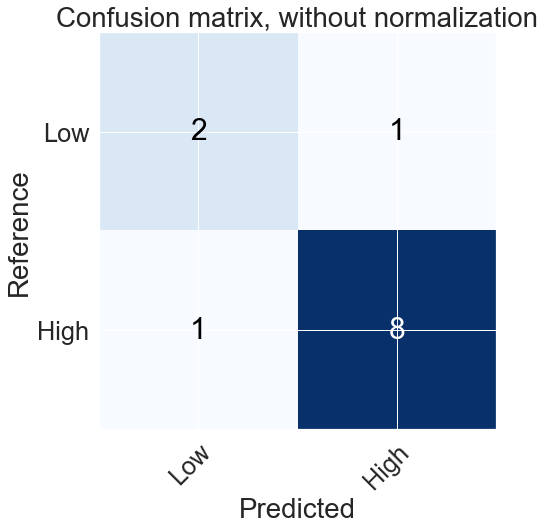

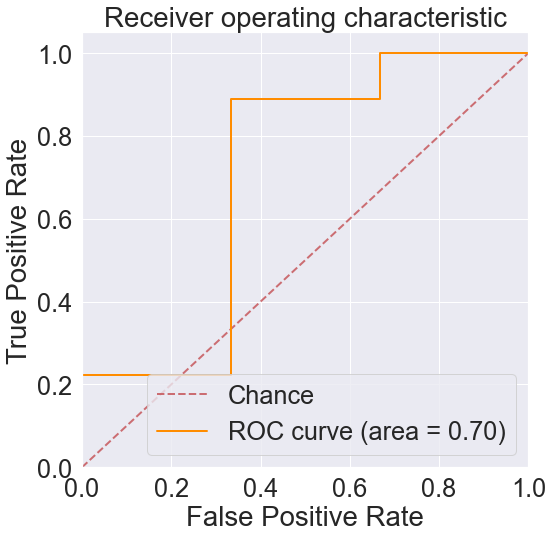

***********************RESULTS FOR SC02 persuasion technique**************************


C:\Users\trevd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best score (accuracy): 0.8235294117647058
Best C: 0.03125
Best Gamma: 3.0517578125e-05
Best Kernel: rbf
Sensitivity: 1.0, Specificity: 0.0
Confusion matrix, without normalization
[[ 0  1]
 [ 0 11]]
AUC:  0.545


C:\Users\trevd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


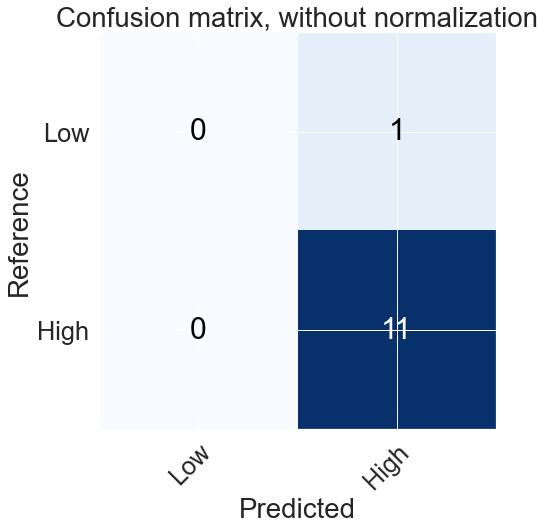

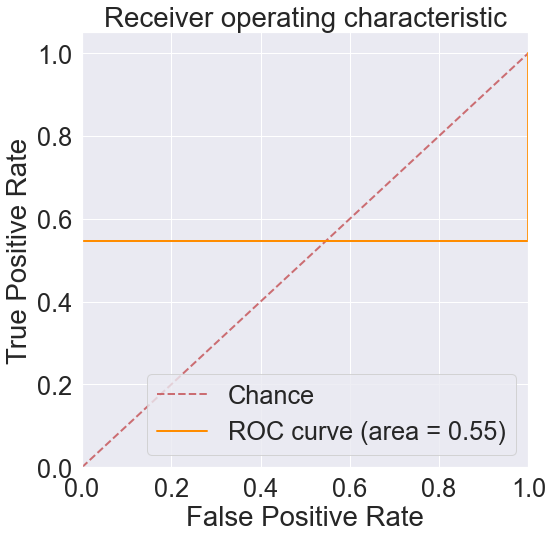

***********************RESULTS FOR SC03 persuasion technique**************************


KeyboardInterrupt: 

In [10]:
# Import data
df = get_data()

techniques = ['SC01','SC02','SC03','SC04','SC05','SC06','SC07','SC08','SC09','SC10',
              'SC11','SC12','SC13','SC14','SC15','SC16','SC17','SC18','SC19']
# Put for loop here to subset data based on persuasion technique
# Need a field on data to subset like Technique
for tech in techniques:
    X, y = binary_data(df, tech)
    # Split data into train (for cross-validation) and hold out test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
              
    # If you want to apply a scaler, fit it to X-train here and then apply to X_train and y_train
    # You can fit it to all the data as you won't know the distirbution of the test (new cases) in practice.
    
    print ('***********************RESULTS FOR ' + tech + ' persuasion technique**************************')
    C, gamma, kernel = svm_cross_validation(X_train, y_train)
    # Train a new classifier on all the cross-validation data using the best parameters found by grid search
    clf_full_training = svm.SVC(C=C, kernel=kernel, gamma=gamma).fit(X_train, y_train)
    # Test the optimised classifier on the hold out test set
    clf_full_training.score(X_test, y_test)
    y_pred = clf_full_training.predict(X_test)
    """
    # Get the confusion matrix using seaborn
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True)
    """
    # Get confusion using custom function
    plot_confusion_matrix(y_test,
                          y_pred,
                          ['Low', 'High']
                         )
    # Plot ROC curve and return AUC
    y_score = clf_full_training.decision_function(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print('AUC:  {}'.format(np.round(roc_auc, 3)))
    plt.figure()
    lw = 2
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()